# Reddit Comment Threads Sentiment Analysis
## Allison Li and Berwin Lan
### Software Design Spring 2021 Midterm Project

## Introduction
In this project, we investigated the nature of human behavior and self-regulation in anonymous virtual spaces. Reddit is an online forum where replies are nested in threads; that is, a single comment can generate many replies as child comments, and each of those comments can then generate its own respective child comments. **We were interested in how sentiments, or emotion, changed throughout a comment thread, and whether sentiment was amplified or damped by increased nesting.** This story is important because of the differences seen in online vs. in-person communication, and our results can help us understand what drives the way people behave and interact in online spaces, especially when anonymous. Our project is organized into data processing in `data_cleaning.py`, sentiment analysis in `sentiment_analysis.py`, and data visualization in this notebook using helper functions from `plotting_functions.py`. We acquired data, cleaned it, analyzed it, and visualized it. In this computational essay, we offer our conclusions and a look into our process.

## Methodology
We used data from Reddit, which we scraped using [PRAW (Python Reddit API Wrapper)](https://pypi.org/project/praw "Allows for simple access to reddit's API.") to access the [Reddit API](https://www.reddit.com/wiki/api "Reddit API Access."). The data is directly stored in .csv files, which are accessed using [pandas](https://pandas.pydata.org/ "A data analysis tool") DataFrames. Our visualizations, created using [seaborn](https://seaborn.pydata.org/) and [matplotlib](https://matplotlib.org/), use the subreddit in which a thread is located, the depth of each individual comment, and the average sentiment of all the comments at a given depth in a given comment thread. In order to get a representative sample of subreddits, we selected subreddits that we anticipated being overall positive (r/MadeMeSmile), overall negative (r/AmItheAsshole, r/TalesFromRetail, r/politics), and overall neutral (r/AskReddit). Using the code enclosed in this repository, our analysis and visualizations can be reproduced using subreddits of the user's choice. By looking at the change in sentiment over each depth in a thread, we can visualize the changes in sentiment through replies and reveal trends that are caused by the preceding depth of comments.

### Data Collection
PRAW has built-in methods that can search for specific subreddits and access their all-time top posts and their comments. We used these methods for each of the subreddits in our list, and stored the data we were interested in by using a dictionary. We then used the `.to_csv()` method to store our dictionaries as .csv files, which were then loaded in as pandas DataFrames for cleaning and analysis.

### Data Processing

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

Data processing is comprised of three steps: cleaning the data, lemmatizing the data, and tokenizing the data. 
* Data cleaning is the process of removing all unwanted characters, such as links and emojis. All letters are also cast to lowercase text.

* Lemmatizing is the process by which different inflections of a word are collapsed into its base form for analysis. For example, the words `coding`, `codes`, and `coder` would all be considered `code` after being lemmatized. An example is shown below.


In [25]:
from data_cleaning import clean_comment, lemmatize_sentence
example_sentence = 'Its wings are too small to get its fat little body off the ground.'
print(f'Example Sentence: {example_sentence}')
print(f'Cleaned and lemmatized sentence: {lemmatize_sentence(example_sentence)}\n')

Example Sentence: Its wings are too small to get its fat little body off the ground.
Cleaned and lemmatized sentence: it wing are too small to get it fat little body off the ground



* Tokenizing the data breaks a block of text into parts; in our case, we tokenized each paragraph of input into sentences. An example is shown below, with `\` as the delimiter.

In [31]:
example_text = 'According to all known laws of aviation, there is no way a bee should be able to fly.'\
                ' Its wings are too small to get its fat little body off the ground. The bee, of course,'\
                ' flies anyway because bees don\'t care what humans think is impossible.'\
                ' Yellow, black. Yellow, black. Yellow, black. Yellow, black. Ooh, black and yellow!'
print(f'Example Text: {example_text}')
print(f'Cleaned, lemmatized, and tokenized comment (with sentences separated): {clean_comment(example_text)}')

Example Text: According to all known laws of aviation, there is no way a bee should be able to fly. Its wings are too small to get its fat little body off the ground. The bee, of course, flies anyway because bees don't care what humans think is impossible. Yellow, black. Yellow, black. Yellow, black. Yellow, black. Ooh, black and yellow!
Cleaned, lemmatized, and tokenized comment (with sentences separated): according to all known law of aviation there is no way a bee should be able to fly\it wing are too small to get it fat little body off the ground\the bee of course fly anyway because bee don t care what human think is impossible\yellow black\yellow black\yellow black\yellow black\ooh black and yellow


### Sentiment Analysis
A general, top-level view of the sentiment analysis we performed is as follows:
* Find and store all the child replies to each top level comment on the top post of the chosen subreddit.
* Organize comments in each thread by depth, where the original comment has a depth of `0`, its replies have a depth of `1`, etc.
* Select the comments with the greatest levels of replies (deepest) to analyze.
* Find the average sentiment of all comments at a depth, and create a dictionary of each depth's average sentiment.

Please refer to `sentiment_analysis.py` for greater detail.

## Results

In [3]:
from sentiment_analysis import analyze_subreddit_by_depth, analyze_subreddit_distribution
import matplotlib.pyplot as plt
import seaborn as sns
import plotting_functions

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ali1\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


### Depth vs. Average compound sentiment score
By plotting a line plot of depth vs. average compound sentiment score, we see that there is a wider range of sentiment from the first comment (depth = 0) compared to the next several layers. The plots of r/AmItheAsshole, which has the greatest sample size out of the subreddits we analyzed, are shown below. Comment depths 0 to 3 appear to converge to a sentiment score of 0, which suggests that at least initially, the sentiment of the first few depths of replies to the initial comment decreases in strength. The bubble plot, also shown below, suggests a correlation between the number of comments and the average sentiment at that depth; with the exception of a few outliers, larger bubbles representing depths with a greater number of comments have an average compound sentiment score closer to 0. By examining the outlier cases, we can preliminarily conclude that consensus between different commenters begins to form after a few replies, and that 1-3 comments for discussion are necessary for consensus.

Looking at the corresponding plots for other subreddits, the trend of depths with the most comments having an average compound sentiment score of +/-0.2 can be observed. This could be due to a myriad of causes, including an equal number of positive and negative sentiments, a general damping of sentiment strength, or a case of VADER analysis being unable to extract a sentiment score from more comments.

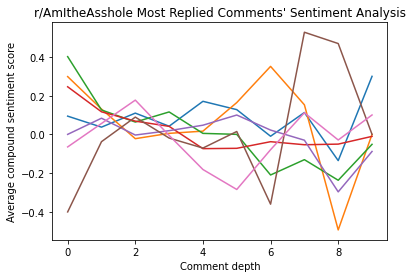

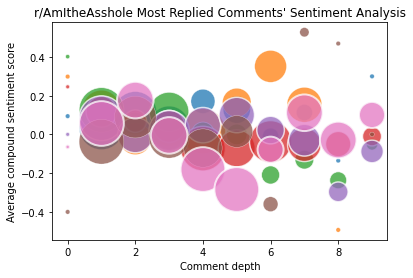

In [4]:
subreddit = "AmItheAsshole"
sentiment_dicts = analyze_subreddit_by_depth(subreddit)
plotting_functions.sentiment_line(subreddit, sentiment_dicts)
plotting_functions.sentiment_bubble(subreddit, sentiment_dicts)

The line plot for r/AmItheAsshole shows an initial convergence toward neutral sentiment, then an expansion of the range of sentiment scores at greater depths. Upon examination of the bubble plot, it is evident that generally, depths with extreme sentiment in either direction contain fewer comments than depths with more neutral sentiment on average.

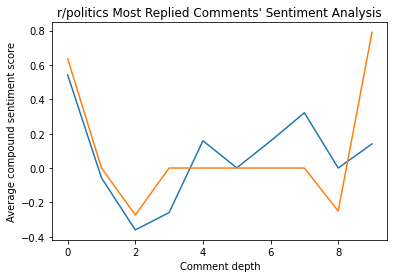

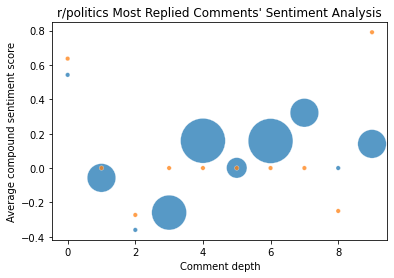

In [5]:
subreddit = 'politics'
sentiment_dicts = analyze_subreddit_by_depth(subreddit)
plotting_functions.sentiment_line(subreddit, sentiment_dicts)
plotting_functions.sentiment_bubble(subreddit, sentiment_dicts)

The data from r/politics shows a greater range of sentiment than the data from r/AmItheAsshole. However, by observing the bubble plot, it is evident that the depths with average sentiment scores at the maxima and minima are represented by a single comment.

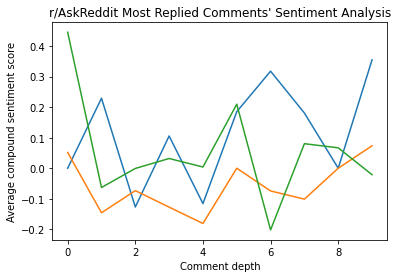

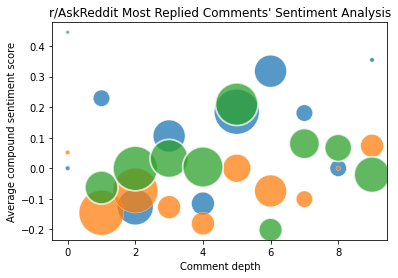

In [6]:
subreddit = 'AskReddit'
sentiment_dicts = analyze_subreddit_by_depth(subreddit)
plotting_functions.sentiment_line(subreddit, sentiment_dicts)
plotting_functions.sentiment_bubble(subreddit, sentiment_dicts)

The average sentiment scores of threads in r/AskReddit are less conclusive, as there are several multi-comment depths at very positive and very negative sentiments. However, there are still no trends that can be drawn from this data, as it appears to have no correlation.

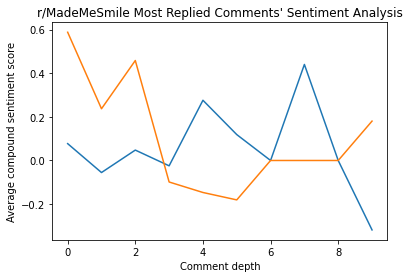

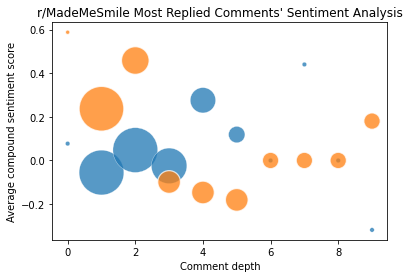

In [7]:
subreddit = 'MadeMeSmile'
sentiment_dicts = analyze_subreddit_by_depth(subreddit)
plotting_functions.sentiment_line(subreddit, sentiment_dicts)
plotting_functions.sentiment_bubble(subreddit, sentiment_dicts)

r/MadeMeSmile displays the same pattern of depths with more comments having a more neutral (closer to zero) average compound sentiment score. While the comments at depths 6, 7, and 8 represented by the orange bubbles suggests a possible trend, this is more likely than not due to the limitations of VADER as a sentiment analysis toolkit. When unable to extract sentiment (from short or nonsensical texts), it will return a neutral value.

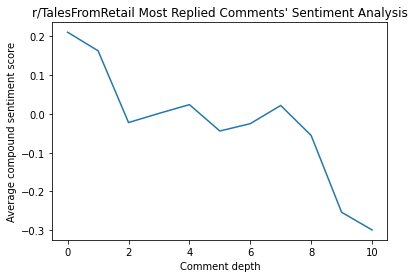

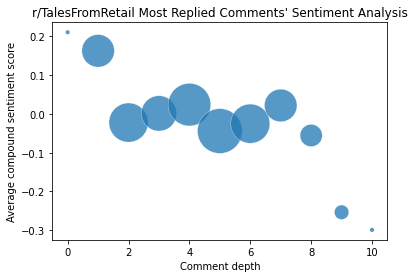

In [8]:
subreddit = 'TalesFromRetail'
sentiment_dicts = analyze_subreddit_by_depth(subreddit)
plotting_functions.sentiment_line(subreddit, sentiment_dicts)
plotting_functions.sentiment_bubble(subreddit, sentiment_dicts)

Unlike the other subreddits, the selected comment from r/TalesFromRetail displays an overall decrease in average compound sentiment score. This observation of this trend comes with several caveats, including that only a single comment thread was used for analysis because it was the only one that had the greatest number of replies (10). Additionally, the clustering of larger bubbles with more comments around neutral is also present in this data, suggesting that the visually negative trend is due to positive outliers at one end and negative outliers at deeper depths.

### Depth vs. Average compound sentiment score change

In the following graphs, we plotted the sentiment change (difference between a depth's score and the top level comment's score) for each comment. The line plots suggest that replies whose parent comment has negative sentiment tends to increase in positivity, while replies whose parent comment has positive sentiment tends to increase in negativity. However, by looking at the bubble plots, it is clear that the majority of comments display small changes in sentiment compared to their parent comment, while large changes are almost always due to a single outlier. Overall, we observe that depths with a greater number of comments display a smaller change in average compound sentiment score, which we explore further in the final section of violin plots.

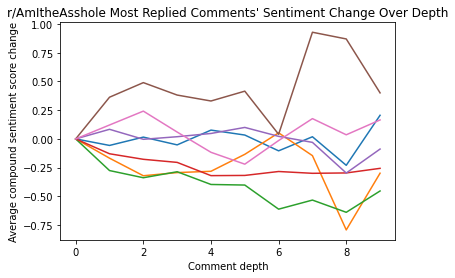

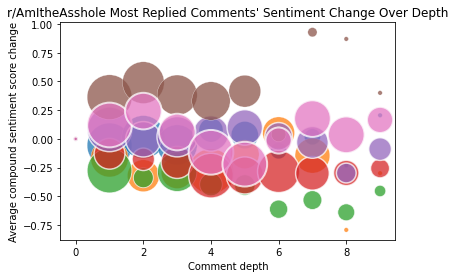

In [9]:
subreddit = 'AmItheAsshole'
sentiment_dicts = analyze_subreddit_by_depth(subreddit)
plotting_functions.sentiment_difference_line(subreddit, sentiment_dicts)
plotting_functions.sentiment_difference_bubble(subreddit, sentiment_dicts)

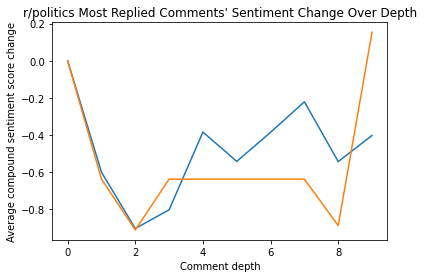

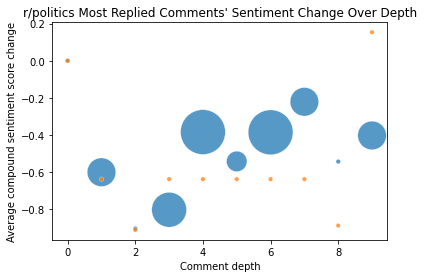

In [10]:
subreddit = 'politics'
sentiment_dicts = analyze_subreddit_by_depth(subreddit)
plotting_functions.sentiment_difference_line(subreddit, sentiment_dicts)
plotting_functions.sentiment_difference_bubble(subreddit, sentiment_dicts)

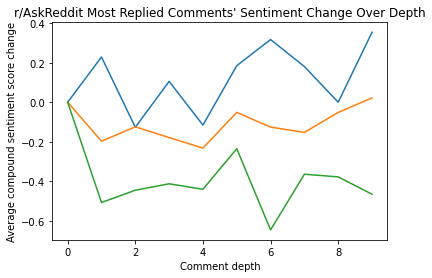

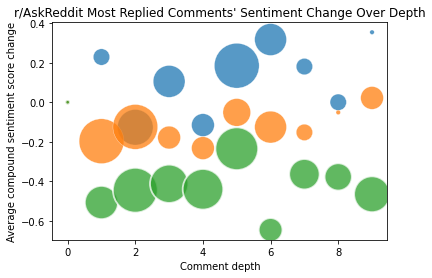

In [11]:
subreddit = 'AskReddit'
sentiment_dicts = analyze_subreddit_by_depth(subreddit)
plotting_functions.sentiment_difference_line(subreddit, sentiment_dicts)
plotting_functions.sentiment_difference_bubble(subreddit, sentiment_dicts)

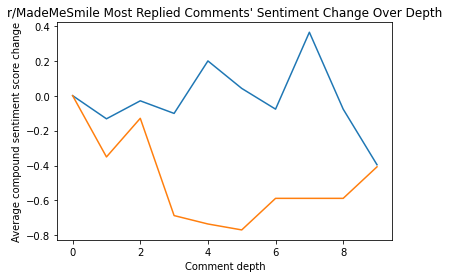

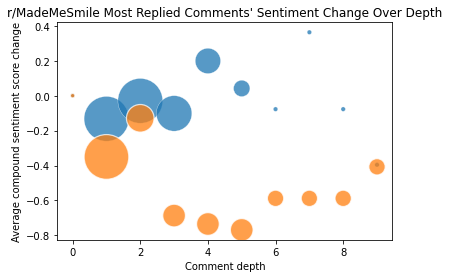

In [12]:
subreddit = 'MadeMeSmile'
sentiment_dicts = analyze_subreddit_by_depth(subreddit)
plotting_functions.sentiment_difference_line(subreddit, sentiment_dicts)
plotting_functions.sentiment_difference_bubble(subreddit, sentiment_dicts)

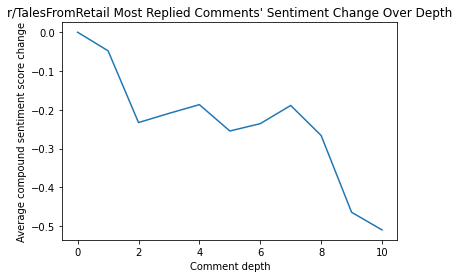

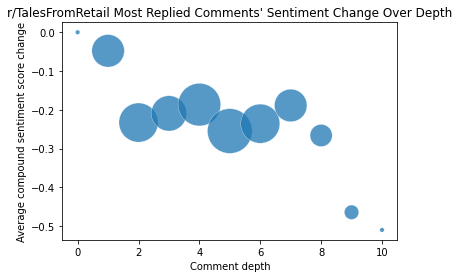

In [13]:
subreddit = 'TalesFromRetail'
sentiment_dicts = analyze_subreddit_by_depth(subreddit)
plotting_functions.sentiment_difference_line(subreddit, sentiment_dicts)
plotting_functions.sentiment_difference_bubble(subreddit, sentiment_dicts)

### Categorized Line and Bubble Plots: comment depth vs. average compound sentiment score change
From the sentiment change graphs above, we categorized each line into separate plots. We hoped to see more definitive trends that were specific to the sentiment of the initial comment. Thus, we categorized the threads based on the sentiment of the starting comment (negative, neutral, positive) and graphed the change in sentiment (i.e. with the starting comment graphed at 0). Generally, we saw that negative comments increased in sentiment while positive comments decreased in sentiment; meaning that overall, comments tended to trend toward neutral over a thread. However, we observed the same characteristic where depths with more comments tended to display less change, so we needed to further investigate the role of sentiment distribution in determining the average sentiment score.

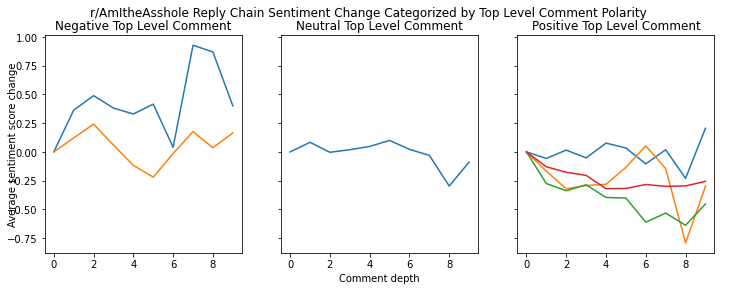

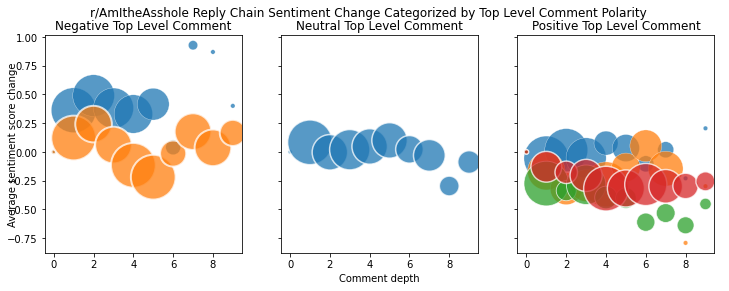

In [14]:
subreddit = 'AmItheAsshole'
sentiment_dicts = analyze_subreddit_by_depth(subreddit)
plotting_functions.sentiment_categorized_line(subreddit, sentiment_dicts)
plotting_functions.sentiment_categorized_bubble(subreddit, sentiment_dicts)

The side-by-side plots separate the threads into categories based on the sentiment of the initial comment. The plots below show some blank plots because there were no parent comments that had sentiments in all the categories. The same trends are observed in the subsequent graphs with other subreddits, which suggests that comment threads' sentiments trend toward zero, with strongly sentimented parent comments being damped with a greater number of replies.

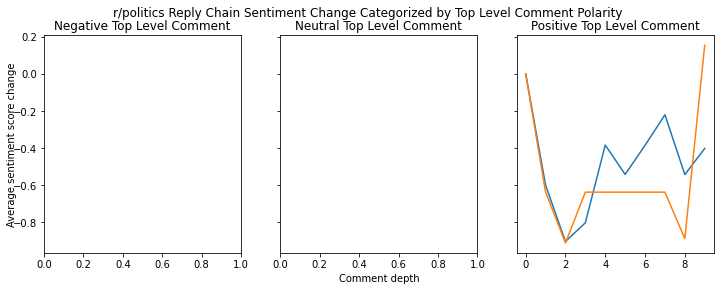

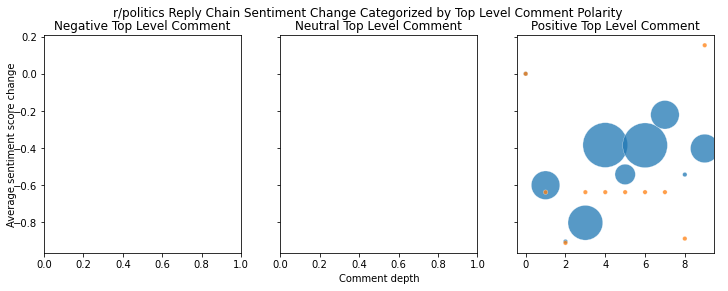

In [15]:
subreddit = 'politics'
sentiment_dicts = analyze_subreddit_by_depth(subreddit)
plotting_functions.sentiment_categorized_line(subreddit, sentiment_dicts)
plotting_functions.sentiment_categorized_bubble(subreddit, sentiment_dicts)

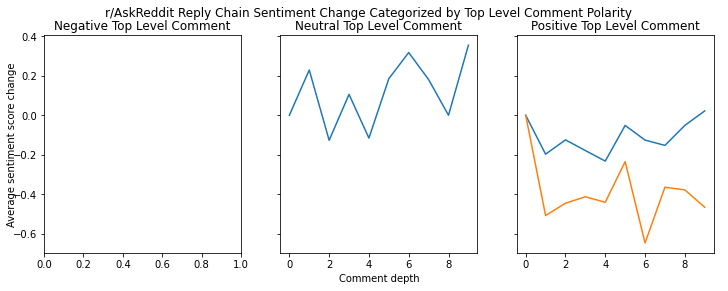

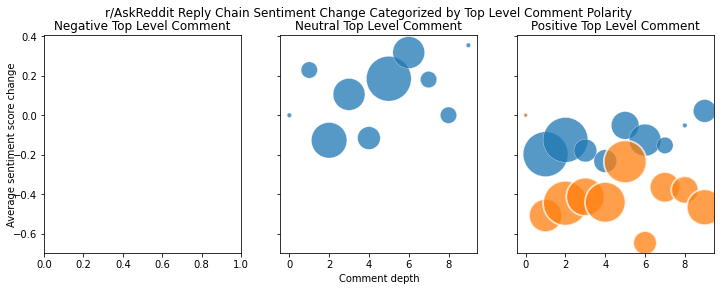

In [16]:
subreddit = 'AskReddit'
sentiment_dicts = analyze_subreddit_by_depth(subreddit)
plotting_functions.sentiment_categorized_line(subreddit, sentiment_dicts)
plotting_functions.sentiment_categorized_bubble(subreddit, sentiment_dicts)

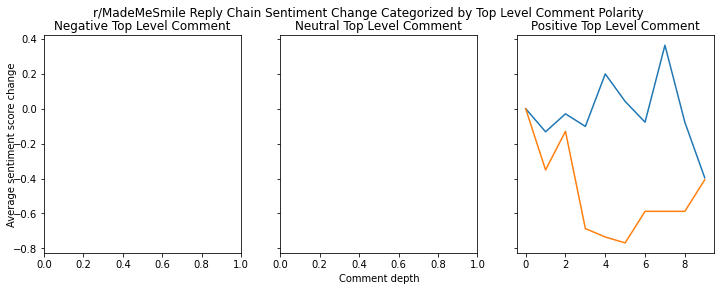

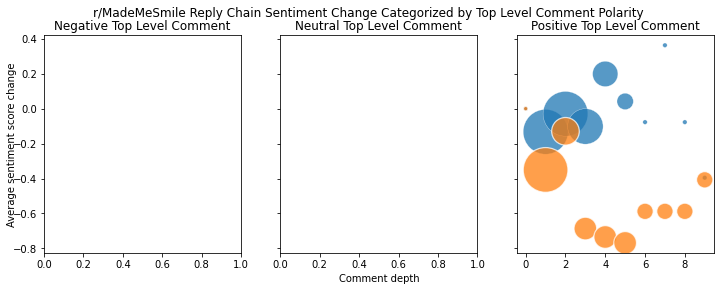

In [17]:
subreddit = 'MadeMeSmile'
sentiment_dicts = analyze_subreddit_by_depth(subreddit)
plotting_functions.sentiment_categorized_line(subreddit, sentiment_dicts)
plotting_functions.sentiment_categorized_bubble(subreddit, sentiment_dicts)

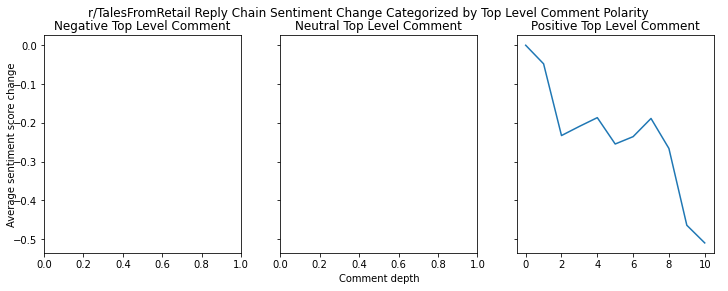

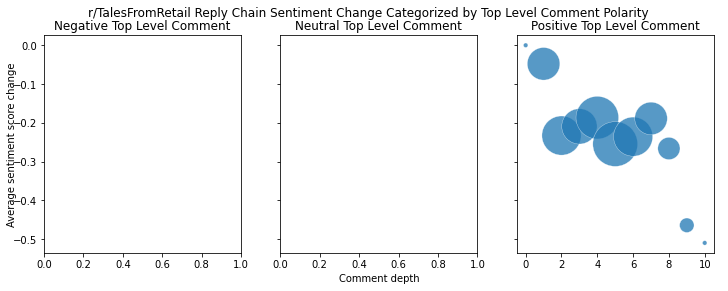

In [18]:
subreddit = 'TalesFromRetail'
sentiment_dicts = analyze_subreddit_by_depth(subreddit)
plotting_functions.sentiment_categorized_line(subreddit, sentiment_dicts)
plotting_functions.sentiment_categorized_bubble(subreddit, sentiment_dicts)

### Violin plots: comment depth vs. compound sentiment score

We used violin plots as another tool to visualize our data, allowing us to see the distribution of sentiments across one depth of commenting. The white dot represents the median compound sentiment score of the layer, with the box extending to the 25th and 75th percentile. The depths with a horizontal bar represent the value of the single comment in that depth of commenting. As seen in the following plots, the bulk of the comments cluster around a score of 0, with outliers in either direction. This is likely in part due to the limitations of VADER as a sentiment analysis tool, as well as the number of comments which are generally neutral in sentiment. This supports the conclusion that there is little correlation between the sentiment of a parent comment and its replies, and that the number of comments within a certain depth (and their sentiment distribution) play an outsized role in overall data analysis over a thread.

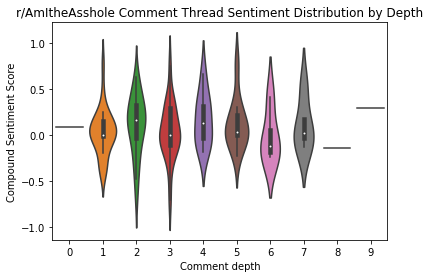

In [19]:
subreddit = 'AmItheAsshole'
sentiment_dicts = analyze_subreddit_distribution(subreddit)
plotting_functions.sentiment_distribution_violin(subreddit, sentiment_dicts[0])

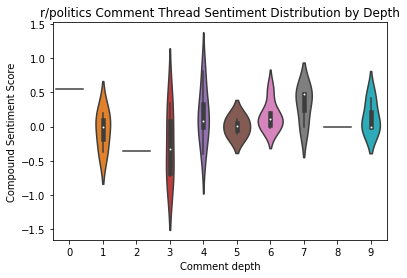

In [20]:
subreddit = 'politics'
sentiment_dicts = analyze_subreddit_distribution(subreddit)
plotting_functions.sentiment_distribution_violin(subreddit, sentiment_dicts[0])

The following plot for r/AskReddit is particularly interesting: the range of sentiment scores at comment depth = 3 validate our belief that often, an average compound sentiment score near zero is simply the result of a number of both positive and negative sentiments averaging out to neutral rather than a reflection of consistently neutral sentiments.

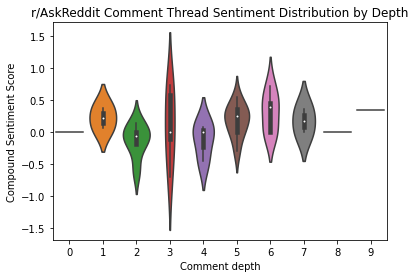

In [21]:
subreddit = 'AskReddit'
sentiment_dicts = analyze_subreddit_distribution(subreddit)
plotting_functions.sentiment_distribution_violin(subreddit, sentiment_dicts[0])

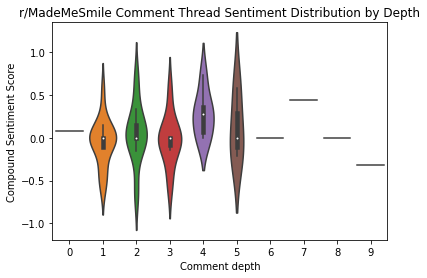

In [22]:
subreddit = 'MadeMeSmile'
sentiment_dicts = analyze_subreddit_distribution(subreddit)
plotting_functions.sentiment_distribution_violin(subreddit, sentiment_dicts[0])

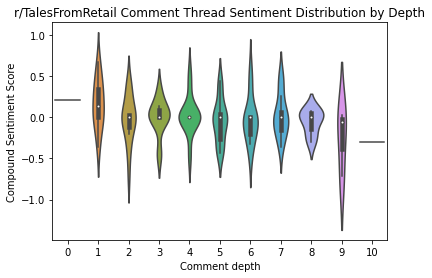

In [23]:
subreddit = 'TalesFromRetail'
sentiment_dicts = analyze_subreddit_distribution(subreddit)
plotting_functions.sentiment_distribution_violin(subreddit, sentiment_dicts[0])

The violin plots expose a weakness of our breadth-first approach, which meant that the _average_ sentiment score of a depth with a large range of individual sentiment scores from its many comments was a poor unidimensional measurement of its sentiment. At best, our data suggests that online forums are places where participants self-regulate emotionally charged speech over the course of a conversation; however, the overall consensus is that the most reliable indicator of a more neutral sentiment of one depth of comments is the number of comments.

## Conclusion

Overall, we conclude that there is no correlation between the sentiment of a reply and its parent comment. As seen in the plots, it appears that the number of comments whose sentiments become more positive is more or less equal to those whose sentiments become more negative, as well as a number of threads whose change in sentiment is close to zero. While we did observe sentiment becoming more neutral over the course of a thread, our small sample size needs to be kept in mind while evaluating those conclusions.

Our project is a very limited, preliminary examination of how the nature of online interaction shapes the emotional content of messages. While we set out to investigate human behavior and how it is impacted by online spaces and anonymity, our small sample size means that any conclusions that can be drawn or trends that can be identified should be regarded with a significant degree of skepticism. Based on the plots we created, they suggest that comments' sentiment strength may decrease compared to the preceding parent comment; overall, there is little data to suggest a concrete correlation between the two.

The ethical implications of understanding communication in online forums include the implementation of moderation, "real-world" legal consequences to online actions, and the regulation and ideals of free speech. Contextually, our findings suggest that at least on Reddit, sentiment is likely not the primary factor driving users to reply to a comment. The way we accessed our data is also in an ethical gray area; while we used Reddit's API to scrape for data, the fact that the comments were made in a public forum does not necessarily give us free access to them for data analysis.

In plotting, we learned that there was a non-negligible amount of data processing that had to occur to get meaningful plots. It was also disappointing to accept that no correlation was a valid conclusion, and that overall, our project did not yield any fundamental understanding about the nature of online interactions between anonymous users.

Cleaning the data in preparation for sentiment analysis was challenging, as there were some inconsistencies in the documentation and resources we were using: for example, we needed to refactor our code to analyze entire sentences rather than individual words. Referring directly to the VADER documentation would have saved us time here. Writing unit tests was also difficult, due to the size and complexity of both the data and VADER/NLTK. 

The next steps of this project would be to gather more data points, both in terms of the length of comment threads and the number of unique contributors at each depth. With a larger sample size, our data can be more reliable and the conlusions more concrete. Another approach we could take is to traverse the tree of comments depth-first rather than breadth first as we did in our analysis. This would mean travelling down an entire branch and possibly comparing different branches together rather than splitting by depth. It would also be helpful to extend similar analysis to other thread-based forums, such as StackOverflow, Slack, or other similar platforms.